In [1]:
import requests
from bs4 import BeautifulSoup
import re #문자열 정규표현식
# API 인증 정보
client_id = 'cAIbXS5p4JJ6yulFQpV3' 
client_secret = 'V6kLk0vC0_'

In [2]:
#header에 추가될 내용
headers = {'X-Naver-Client-Id':client_id, 'X-Naver-Client-Secret':client_secret}
print("검색 키워드를 입력하세요")
keyword = input()
print("검색 포스트 수를 입력하세요(20단위)")
numberOfPost = input()

검색 키워드를 입력하세요
크린토피아
검색 포스트 수를 입력하세요(20단위)
500


In [3]:
nblock = int( int(numberOfPost)/20 )
urlBank =[]
for i in range(0, nblock):
    start = i*20 + 1
    urlBank.append("https://openapi.naver.com/v1/search/blog?query="+keyword+"$&display=20&start="+str(start)+"&sort=sim")


In [6]:
nPost = 1

for url in urlBank:
    result = requests.get(url, headers=headers)
    information = result.json()
    items = information['items']
    urls = []
    for item in items:
        urls.append(item['link'])
    
    file = open('topia.txt', "a")

    for url in urls:
        print('{} 번째 블로그 글'.format(nPost))
        nPost = nPost + 1
        sentence = blogPageAccess(url)
        file.write( sentence+"\n\n" )
    
    file.close()

1 번째 블로그 글
2 번째 블로그 글
3 번째 블로그 글
4 번째 블로그 글
5 번째 블로그 글
6 번째 블로그 글
7 번째 블로그 글
8 번째 블로그 글
9 번째 블로그 글
10 번째 블로그 글
11 번째 블로그 글
12 번째 블로그 글
13 번째 블로그 글
14 번째 블로그 글
15 번째 블로그 글
16 번째 블로그 글
17 번째 블로그 글
18 번째 블로그 글
19 번째 블로그 글
20 번째 블로그 글
21 번째 블로그 글
22 번째 블로그 글
23 번째 블로그 글
24 번째 블로그 글
25 번째 블로그 글
26 번째 블로그 글
27 번째 블로그 글
28 번째 블로그 글
29 번째 블로그 글
30 번째 블로그 글
31 번째 블로그 글
32 번째 블로그 글
33 번째 블로그 글
34 번째 블로그 글
35 번째 블로그 글
36 번째 블로그 글
37 번째 블로그 글
38 번째 블로그 글
39 번째 블로그 글
40 번째 블로그 글
41 번째 블로그 글
42 번째 블로그 글
43 번째 블로그 글
44 번째 블로그 글
45 번째 블로그 글
46 번째 블로그 글
47 번째 블로그 글
48 번째 블로그 글
49 번째 블로그 글
50 번째 블로그 글
51 번째 블로그 글
52 번째 블로그 글
53 번째 블로그 글
54 번째 블로그 글
55 번째 블로그 글
56 번째 블로그 글
57 번째 블로그 글
58 번째 블로그 글
59 번째 블로그 글
60 번째 블로그 글
61 번째 블로그 글
62 번째 블로그 글
63 번째 블로그 글
64 번째 블로그 글
65 번째 블로그 글
66 번째 블로그 글
67 번째 블로그 글
68 번째 블로그 글
69 번째 블로그 글
70 번째 블로그 글
71 번째 블로그 글
72 번째 블로그 글
73 번째 블로그 글
74 번째 블로그 글
75 번째 블로그 글
76 번째 블로그 글
77 번째 블로그 글
78 번째 블로그 글
79 번째 블로그 글
80 번째 블로그 글
81 번째 블로그 글
82 번째 블로그 글
83 번째 블로그 글
84 번째 블로그 글
8

In [4]:
def blogPageAccess(url):
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.text, "html.parser")
    try:
        iframe = soup.find('iframe')
        subUrl = iframe.get('src')
        urlbase = "https://blog.naver.com/"
        url = urlbase + subUrl
        return getSentence(url) 
    except:
        return ""

In [5]:
def getSentence(url):
    webpage = requests.get(url)
    soup = BeautifulSoup( webpage.text, 'html.parser')
    comments = soup.findAll('span', {'class':'se-fs-'})
   
    words = [comment.text for comment in comments]
    
    pattern = re.compile('[^ 0-9a-zA-Zㄱ-ㅣ가-힣!#?]')
    
    sentence = ""   
    for line in words:
        sentence = sentence + line
   
    sentence = pattern.sub('', sentence)
  
    return sentence

# https://graphemica.com/%E2%97%98
# 위 사이트 참고

In [7]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import nltk
from konlpy.tag import Okt
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

t = Okt()
file = open('topia.txt')
text = file.read()
file.close()


In [8]:

token = t.nouns(text) ##분리

words_b = nltk.Text(token, name = '토피아')


In [9]:
words = nltk.Text(words_b)
words.vocab().most_common(50)

[('토피아', 740),
 ('린', 736),
 ('빨래', 672),
 ('세탁', 546),
 ('코인', 497),
 ('방', 428),
 ('이용', 333),
 ('워시', 219),
 ('세탁소', 212),
 ('이불', 177),
 ('수', 163),
 ('차', 154),
 ('옷', 140),
 ('은우', 136),
 ('세탁기', 134),
 ('건조기', 134),
 ('세탁물', 132),
 ('가능', 130),
 ('할인', 129),
 ('시간', 107),
 ('점', 107),
 ('셀프', 105),
 ('것', 101),
 ('볼펜', 94),
 ('워', 86),
 ('운동화', 84),
 ('건조', 81),
 ('집', 74),
 ('위치', 73),
 ('때', 70),
 ('매장', 68),
 ('주차', 68),
 ('천재', 67),
 ('때문', 67),
 ('창업', 67),
 ('서비스', 66),
 ('한번', 64),
 ('무인', 56),
 ('후', 56),
 ('사용', 55),
 ('저', 55),
 ('주소', 55),
 ('이벤트', 54),
 ('유연제', 53),
 ('편의점', 53),
 ('운영', 52),
 ('층', 51),
 ('시', 51),
 ('함', 50),
 ('동전', 49)]

In [79]:
stop_words = ['사람','조금','우리','안','또','제','첫','총','함','문','거','카존','나','점','시','코','키','이','게','후','해','번','때','제주도','거제','및','등','앱','경우','분','무료','저희','썬팅','더','아이나비','생각','이번','함안','카','그린','수','것','때','곳','분','이용','차량','결제','사용','비','차','여름','후','저','때문','바로','정도','전면','번','이','내','톡','좀','링','정말','집','전','양','날','용','존','샤크','용''사실','카를','타고','차단']
words = [each_word for each_word in words_b if each_word not in stop_words]

In [81]:
words = nltk.Text(words)
words.vocab().most_common(100)

[('반납', 75),
 ('시간', 72),
 ('요금', 61),
 ('후기', 50),
 ('주행', 47),
 ('사고', 46),
 ('확인', 40),
 ('카드', 37),
 ('할인', 37),
 ('운전', 36),
 ('주차', 33),
 ('사진', 33),
 ('문제', 33),
 ('서비스', 33),
 ('어플', 30),
 ('주차장', 29),
 ('예약', 27),
 ('쿠폰', 25),
 ('친구', 24),
 ('주유', 24),
 ('거리', 24),
 ('패스', 24),
 ('발생', 23),
 ('대여', 22),
 ('처음', 22),
 ('장소', 22),
 ('선택', 21),
 ('처리', 21),
 ('추가', 20),
 ('금액', 19),
 ('레이', 19),
 ('도착', 19),
 ('출발', 19),
 ('고객', 19),
 ('카쉐어링', 17),
 ('그냥', 17),
 ('오후', 16),
 ('센터', 16),
 ('위치', 15),
 ('수리', 15),
 ('비용', 15),
 ('가입', 15),
 ('상태', 14),
 ('직접', 14),
 ('버튼', 14),
 ('운행', 14),
 ('연락', 14),
 ('등록', 14),
 ('여행', 13),
 ('포스팅', 13),
 ('이후', 13),
 ('방법', 13),
 ('접수', 13),
 ('완료', 13),
 ('검색', 12),
 ('하나', 12),
 ('렌트', 12),
 ('다음', 12),
 ('상담', 12),
 ('지정', 12),
 ('렌트카', 11),
 ('장점', 11),
 ('요즘', 11),
 ('근처', 11),
 ('주변', 11),
 ('보험료', 11),
 ('사실', 11),
 ('대한', 11),
 ('가격', 11),
 ('티', 11),
 ('꼭', 11),
 ('다시', 11),
 ('미리', 11),
 ('혹시', 11),
 ('감자탕', 11),
 ('전기차', 10),
 ('지불

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
words.plot(50)
plt.axis("off")
plt.show()

<Figure size 1600x800 with 1 Axes>

<Figure size 640x480 with 1 Axes>

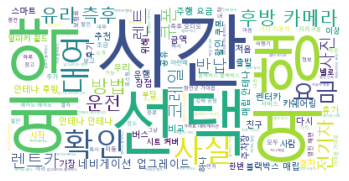

In [54]:
import matplotlib.cm as cm 
from wordcloud import WordCloud
text =""
for s in words:
    text = text + s + ' '

wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.2,
               background_color='white',
               colormap = cm.viridis,
               repeat = True).generate(text)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear") #interpolation : 보간 지정
plt.show()
